In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

import sys
import glob
sys.path.append("..")

import src.visualization as vis

In [124]:
fname="../data/model_sims/baseline/haddock/1985/03/fiscm_group_001.nc"

In [125]:
ds = nc.Dataset(fname)

In [127]:
ds.dimensions['time'].size

122

In [51]:
xs = ds["x"][:, :].data
ys = ds["y"][:, :].data
status = ds["status"][:, :].data

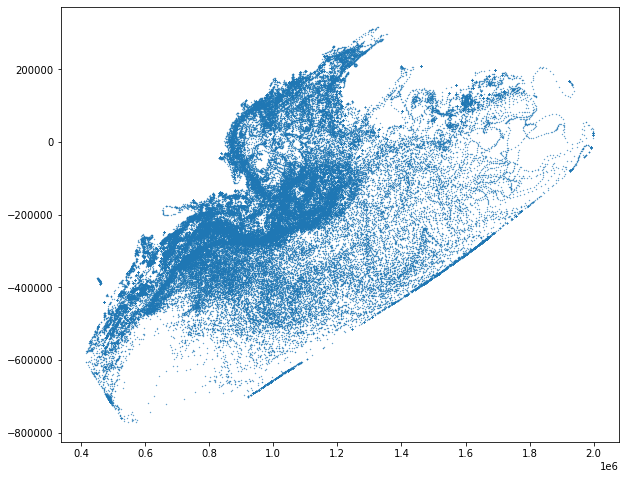

In [37]:
ii = np.random.randint(0, xs.shape[1], size=1000)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.scatter(xs[:, ii], ys[:, ii], s=0.1)

In [5]:
basedir="../data/model_sims/baseline/atlantic-cod"

In [6]:
def get_files_for_year(basedir, year, fname):
    return glob.glob("{}/{}/**/{}.nc".format(basedir, year, fname))

In [31]:
ncfiles = get_files_for_year(basedir, 1988, "fiscm*")

In [7]:
def concatenate_files(ncfiles, variables, dims):
    master_vars = []
    for v, d in zip(variables, dims):
        print(v)
        if v == "month":
            continue
        va = np.zeros(shape=(d, 1))
        master_vars.append(va)
        
    months = np.zeros(shape=(1,))
        
    for f in ncfiles:
        print(f)
        month = int(f.split("/")[-2].split(".")[0].split("_")[-1])
        
        dset = nc.Dataset(f)
        
        size = dset.dimensions['nlag'].size
        
        for i, v in enumerate(variables):
            var = dset[v][:].data
            mv = master_vars[i]
            mv = np.concatenate((mv, var), axis=1)
            master_vars[i] = mv
            
        ms = np.full((size,), month)
        
        months = np.concatenate((months, ms), axis=0)
            
        dset.close()
        
    master_vars.append(months)
            
    return master_vars

def concatenate_years(years, basedir, fname, variables, dims):
    
    master_vars = []
    for v, d in zip(variables, dims):
        va = np.zeros(shape=(d, 1))
        master_vars.append(va)
    
    for y in years:
        ncfiles = get_files_for_year(basedir, y, fname)
        mvs = concatenate_months(ncfiles, variables, dims)
        for i, v in enumerate(variables):
            mv = master_vars[i]
            mv = np.concatenate((mv, mvs[i]), axis=1)
            master_vars[i] = mv
            
    return master_vars
        

In [ ]:
fname="../data/model_sims/warm/american-butterfish/2013/07/fiscm_group_001.nc-001"
ds = nc.Dataset(fname)

t = ds.dimensions['time'].size
variables = []

for v in ds.variables:
    variables.append(v)

variables = variables[1:]

ds.close()

basedir="../data/model_sims/warm/american-butterfish/2013/07"
ncfiles = [basedir+"/fiscm_group_001.nc-001", basedir+"/fiscm_group_001.nc-003", basedir+"/fiscm_group_001.nc-004", basedir+"/fiscm_group_001.nc-005"]
mvs = concatenate_files(ncfiles, variables=variables, dims=np.full((len(variables),), t))

x
y
h
pathlength
cell
u
v
w
z
s
status
PASD
T
stage
diapause
CHL_2DIM
../data/model_sims/warm/american-butterfish/2013/07/fiscm_group_001.nc-001
../data/model_sims/warm/american-butterfish/2013/07/fiscm_group_001.nc-003
../data/model_sims/warm/american-butterfish/2013/07/fiscm_group_001.nc-004
../data/model_sims/warm/american-butterfish/2013/07/fiscm_group_001.nc-005


In [5]:
import os
annual_fname="../data/model_sims/warm/american-butterfish/2013/07/fiscm_group_001.nc"
if os.path.exists(annual_fname):
    os.remove(annual_fname)

annual = nc.Dataset(annual_fname, 'w', format="NETCDF4")

annual.createDimension("time", mvs[0].shape[0])
annual.createDimension("nlag", mvs[0].shape[1])

nc_variables = []
for i, mv in enumerate(mvs[:-1]):
    var = annual.createVariable(variables[i], "f8", ("time", "nlag"))
    var[:, :] = mv
    nc_variables.append(var)

month_var = annual.createVariable("month", "u8", ("nlag",))
month_var[:] = mvs[-1]

annual.close()

In [14]:
import os

In [10]:
import os
for y in range(2016, 2017):

    fname="../data/model_sims/warm/american-butterfish/2012/05/fiscm_group_001.nc"
    ds = nc.Dataset(fname)
    
    t = ds.dimensions['time'].size
    variables = []

    for v in ds.variables:
        variables.append(v)

    variables = variables[1:]
    
    ds.close()

    basedir="../data/model_sims/warm/american-butterfish"
    ncfiles = get_files_for_year(basedir, y, "fiscm_group_001")
    mvs = concatenate_files(ncfiles, variables=variables, dims=np.full((len(variables),), t))

    annual_fname="../data/model_sims/warm/american-butterfish/{}/annual.nc".format(y)
    if os.path.exists(annual_fname):
        os.remove(annual_fname)

    annual = nc.Dataset(annual_fname, 'w', format="NETCDF4")

    annual.createDimension("time", mvs[0].shape[0])
    annual.createDimension("nlag", mvs[0].shape[1])

    nc_variables = []
    for i, mv in enumerate(mvs[:-1]):
        var = annual.createVariable(variables[i], "f8", ("time", "nlag"))
        var[:, :] = mv
        nc_variables.append(var)

    month_var = annual.createVariable("month", "u8", ("nlag",))
    month_var[:] = mvs[-1]

    annual.close()

x
y
h
pathlength
cell
u
v
w
z
s
status
PASD
T
stage
diapause
CHL_2DIM
../data/model_sims/warm/american-butterfish/2016/05/fiscm_group_001.nc
../data/model_sims/warm/american-butterfish/2016/08/fiscm_group_001.nc
../data/model_sims/warm/american-butterfish/2016/09/fiscm_group_001.nc
../data/model_sims/warm/american-butterfish/2016/07/fiscm_group_001.nc
../data/model_sims/warm/american-butterfish/2016/06/fiscm_group_001.nc


In [5]:
fname="../data/model_sims/warm/american-butterfish/2016/05/fiscm_group_001.nc"
ds = nc.Dataset(fname)

ds.variables

OrderedDict([('y',
              <class 'netCDF4._netCDF4.Variable'>
              float64 y(time, nlag)
              unlimited dimensions: 
              current shape = (97, 436280)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('h',
              <class 'netCDF4._netCDF4.Variable'>
              float64 h(time, nlag)
              unlimited dimensions: 
              current shape = (97, 436280)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('pathlength',
              <class 'netCDF4._netCDF4.Variable'>
              float64 pathlength(time, nlag)
              unlimited dimensions: 
              current shape = (97, 436280)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('cell',
              <class 'netCDF4._netCDF4.Variable'>
              float64 cell(time, nlag)
              unlimited dimensions: 
              current shape = (97, 436280)
     

In [28]:
fname="../data/model_sims/warm/american-butterfish/2013/annual.nc"
ds = nc.Dataset(fname)
x, y = ds['x'][-1, 1:].data, ds['y'][-1, 1:].data

In [29]:
import matplotlib.pyplot as plt

(-1000000.0, 750000.0)

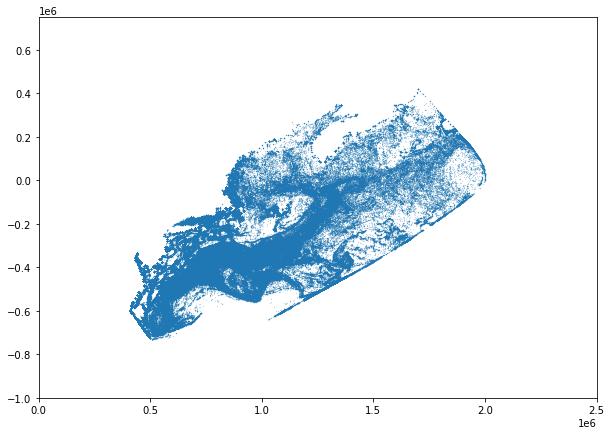

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.scatter(x, y, s=0.01)
ax.set_xlim((0, 0.25e7))
ax.set_ylim((-1e6, 0.75e6))

In [4]:
fname="../data/model_sims/warm/american-butterfish/2016/05/fiscm_group_001.nc-001"
ds = nc.Dataset(fname)

ds.variables

OrderedDict([('time',
              <class 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  long_name: time
                  units: days since 0.0
                  time_zone: none
              unlimited dimensions: time
              current shape = (97,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('x',
              <class 'netCDF4._netCDF4.Variable'>
              float64 x(time, nlag)
                  long_name: x location
                  units: m
              unlimited dimensions: time
              current shape = (97, 71832)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('y',
              <class 'netCDF4._netCDF4.Variable'>
              float64 y(time, nlag)
                  long_name: y location
                  units: m
              unlimited dimensions: time
              current shape = (97, 71832)
              filling on, default _FillValue o

In [21]:
max(x)

1999298.9463279406